<a href="https://colab.research.google.com/github/FerBarrey/An-lisis-cuantitativo-avanzados/blob/main/Ejercicio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 6

## Cargar la base

La siguiente base describe datos sobre los salarios, la formación y la experiencia de empleados que realizan entrevistas de trabajo.

In [13]:
import pandas as pd
import numpy as np

In [14]:
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mohithsairamreddy/salary-data

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data
License(s): Community Data License Agreement - Sharing - Version 1.0
salary-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [16]:
## Cargamos la base
df = pd.read_csv('/content/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Procesamiento de la base

Vemos que la variable `Education Level` tiene varios valores similares escritos de manera distinta.

In [17]:
df["Education Level"].value_counts()

,count
Education Level,
Bachelor's Degree,2267
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


Para unificar estos valores, la recatogrizamos creando una nueva variable denominada `Education New`:

In [18]:
df["Education New"]=df["Education Level"].copy()

In [19]:
df.loc[df["Education Level"].str.contains("Bach", na=False), "Education New"] = "Bachelor's"
df.loc[df["Education Level"].str.contains("Mast", na=False), "Education New"] = "Master's"
df.loc[df["Education Level"].str.contains("hD", na=False), "Education New"] = "PhD"

Verificamos que con estos cambios, las categorías quedaron unificadas

In [20]:
df["Education New"].value_counts()

,count
Education New,
Bachelor's,3023
Master's,1861
PhD,1369
High School,448


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Education New        6701 non-null   object 
dtypes: float64(3), object(4)
memory usage: 366.8+ KB


In [22]:
#utilizo otro metodo para indetificar el total de valores faltantes
df.isna().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5
Education New,3


Borramos además los datos faltantes de la base

In [23]:
df=df.dropna()

Verificamos que ahora no quedan datos faltantes

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Education New        6698 non-null   object 
dtypes: float64(3), object(4)
memory usage: 418.6+ KB


# Preguntas

## Pregunta 1

Contar la cantidad total de individuos y la cantidad de personas de cada género en la base. Con estos datos, calcular el porcentaje de cada género en la base.

*Ayuda:* el atributo `.shape` devuelve la cantidad de filas y columnas de una base. Por lo tanto, tomando `df.shape[0]` se calcula la cantidad de filas de la base `df` y por lo tanto, la cantidad de individuos.
Para contar la cantidad de mujeres, por ejemplo, se puede recorrer todas las filas de "Gender" viendo en cada instancia si el valor coincide con "Female". Cuando se suman esos valores, se obtiene la cantidad de mujeres: `np.sum(df["Gender"]=="Female")`


**Desarrollo Pregunta 1**

In [26]:
df.shape[0]

6698

In [27]:
np.sum(df["Gender"]=="Female")

3013

In [34]:
#Con este codigo puedo ver los valores unicos de la columna Genero
print(df['Gender'].unique())

['Male' 'Female' 'Other']


In [36]:
#Con este codigo calculo el % que represente el valor Other
total_individuos = df.shape[0]
other_individuos = np.sum(df["Gender"]=="Other")
porcentaje_other = (other_individuos / total_individuos) * 100
print(f"El porcentaje de 'Other' es: {porcentaje_other:.2f}%")

El porcentaje de 'Other' es: 0.21%


In [39]:
#Con este codigo calculo el % que represente el valor Female
total_individuos = df.shape[0]
female = np.sum(df["Gender"]=="Female")
porcentaje_female = (female / total_individuos) * 100
print(f"El porcentaje de 'Female' es: {porcentaje_female:.2f}%")


El porcentaje de 'Female' es: 44.98%


## Pregunta 2

Notemos que el porcentaje identificado como `Other` en la base es pequeño y no es un número que permita obtener conclusiones estadísticas pertinentes.

El porcentaje de hombres y mujeres parece equilibrado, sin embargo, calcular un intervalo de confianza para la proporción de mujeres. ¿Diría que podría considerarse del 50% el porcentaje de mujeres?

*Ayuda:* Utilizar la función provista y los datos del ejercicio anterior. En caso de necesitarlo, utilice el "help" para entender cómo funciona la función. Recordar que el comando devuelve proporciones (entre 0 y 1), no porcentajes (entre 0 y 100).

In [30]:
from statsmodels.stats.proportion import proportion_confint

In [31]:
help(proportion_confint)

Help on function proportion_confint in module statsmodels.stats.proportion:

proportion_confint(count, nobs, alpha: float = 0.05, method='normal')
    Confidence interval for a binomial proportion
    
    Parameters
    ----------
    count : {int or float, array_like}
        number of successes, can be pandas Series or DataFrame. Arrays
        must contain integer values if method is "binom_test".
    nobs : {int or float, array_like}
        total number of trials.  Arrays must contain integer values if method
        is "binom_test".
    alpha : float
        Significance level, default 0.05. Must be in (0, 1)
    method : {"normal", "agresti_coull", "beta", "wilson", "binom_test"}
        default: "normal"
        method to use for confidence interval. Supported methods:
    
         - `normal` : asymptotic normal approximation
         - `agresti_coull` : Agresti-Coull interval
         - `beta` : Clopper-Pearson interval based on Beta distribution
         - `wilson` : Wilson

## Pregunta 3

Calcular un intervalo de confianza para el salario medio y comparar los salarios medios entre hombres y mujeres con la misma metodología, a partir de los datos de esta base.

*Ayuda:* Se están evaluando medias, no porcentajes, por lo que se usa la función provista. La diferencia entre ambos intervalos reside en la cantidad de conjuntos de datos que se pasan como argumento. Para identificar, por ejemplo, los datos de salarios sólo de las mujeres, se puede utilizar el siguiente comando: `df.Salary[df["Gender"]=="Female"]`

In [ ]:
from statsmodels.stats.weightstats import zconfint

In [ ]:
help(zconfint)

In [43]:
# Calculamos la proporción de mujeres
total_individuos = df.shape[0]
proporcion_mujeres = female / total_individuos

# Calculamos el intervalo de confianza
intervalo = proportion_confint(count=female, nobs=total_individuos, alpha=0.05)

# Imprimimos el intervalo de confianza
print(f"Intervalo de confianza para la proporción de mujeres: {intervalo}")

Intervalo de confianza para la proporción de mujeres: (0.4379220162322656, 0.46174952751213566)


## Pregunta 4

Utilizar el comando `relplot` del paquete `seaborn` para ver cómo se distribuyen los salarios según el nivel educativo (utilizar la variable `Education New` para evitar un exceso de paneles), haciendo un scatterplot por cada categoría.

*Ayuda:* El comando `relplot` puede hacer gráficos de línea (lineplot) o de dispersión (scatterplot) separando automáticamente por los valores de alguna variable categórica. Por ejemplo, para este caso, el objetivo es utilizar la base (`data=df`) para hacer un scatterplot (`kind="scatter"`) donde se visualice la relación entre `x="Gender"` e `y="Salary"`, separando en columnas por `col="Education New"`.

**Comentario:** Notar lo que sucede con el nivel "Other" de la variable "Gender". Hay mayor representación en los que tienen el secundario completo. Esto podría estar asociado a la edad y una conclusión inicial (pero incompleta) podría ser que las personas que se identifican con género no binario crecieron con el tiempo, ya que asumimos que son personas más jóvenes al no haber llegado a un mayor nivel educativo. Sin embargo, esta conclusión inicial omite que con el tiempo las personas que no se identifican con un género específico durante años sintieron la necesidad de reprimirlo y que con las discusiones que se llevan a cabo hoy ya no sienten esa necesidad.


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
help(sns.relplot)

Help on function relplot in module seaborn.relational:

relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The `kind` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with `kind="scatter"`; the default)
    - :func:`lineplot` (with `kind="line"`)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see 

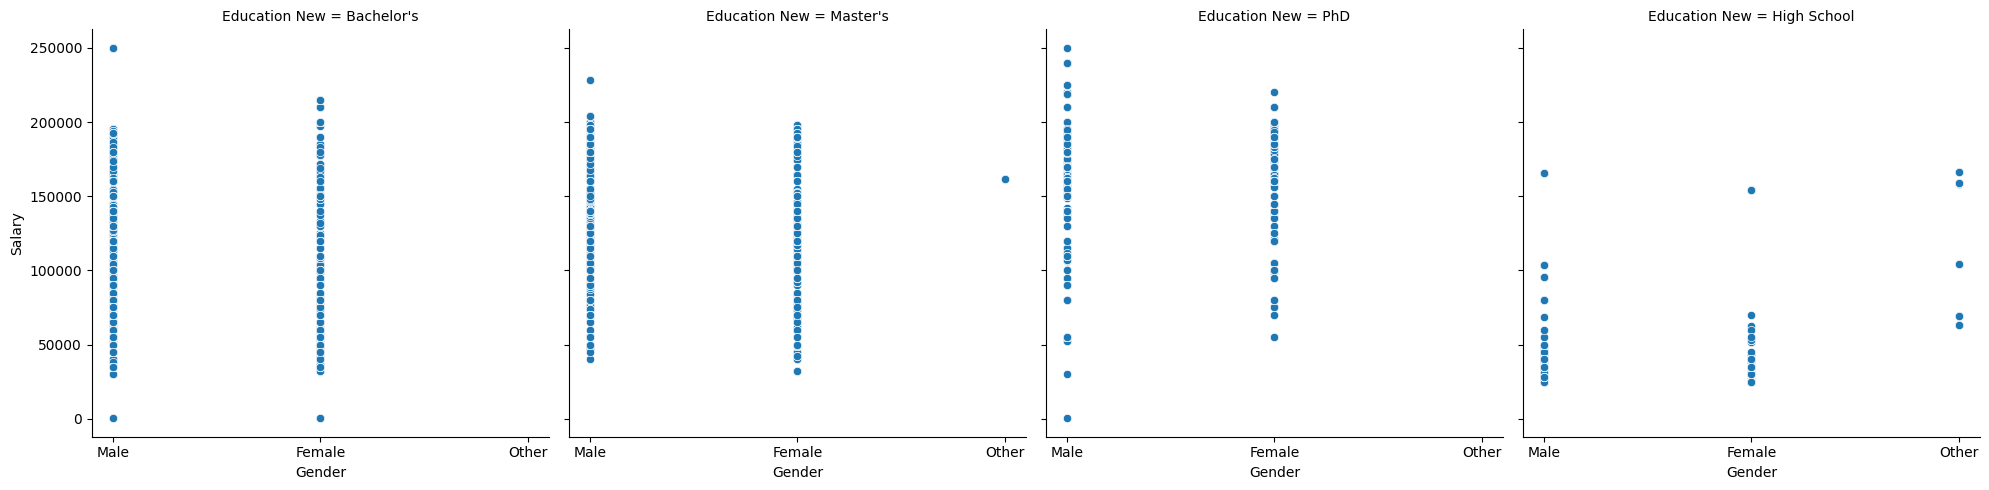

In [46]:
#generamos el grafico
sns.relplot(data=df, kind="scatter", x="Gender", y="Salary", col="Education New")
plt.show()

## Pregunta 5

Comparar con intervalos de confianza el salario medio de hombres y mujeres a través de todos los niveles educativos, a partir de los datos de la base. Es decir, seleccionar los salarios de los hombres que tienen el secundario completo y compararlo con los salarios de las mujeres que tienen el secundario completo, y así sucesivamente con los otros niveles educativos. Serían 4 intervalos de confianza.

*Ayuda:* Es similar a la pregunta 3, aunque hay que hacer una selección extra para cada intervalo. Para seleccionar, por ejemplo, las mujeres que tienen el secundario completo, tendrían que usar el comando
`df.Salary[(df["Gender"]=="Female") & (df["Education New"]=="High School")]`



```
from statsmodels.stats import weightstats as smsw
df=df[np.isnan(df["Salary"])==False]
dfM=df[df["Gender"]=="Male"]
dfM=dfM[np.isnan(dfM["Salary"])==False]
dfF=df[df["Gender"]=="Female"]
dfF=dfF[np.isnan(dfF["Salary"])==False]
print(smsw.zconfint(df["Salary"],ddof=0))
print(smsw.zconfint(dfM["Salary"],dfF["Salary"],ddof=0))
print(smsw.zconfint(dfM["Salary"][dfM["Education New"]=="Bachelor's"],dfF["Salary"][dfF["Education New"]=="Bachelor's"],ddof=0))
print(smsw.zconfint(dfM["Salary"][dfM["Education New"]=="Master's"],dfF["Salary"][dfF["Education New"]=="Master's"],ddof=0))
print(smsw.zconfint(dfM["Salary"][dfM["Education New"]=="PhD"],dfF["Salary"][dfF["Education New"]=="PhD"],ddof=0))
print(smsw.zconfint(dfM["Salary"][dfM["Education New"]=="High School"],dfF["Salary"][dfF["Education New"]=="High School"],ddof=0))
```



In [47]:
from statsmodels.stats import weightstats as smsw
df=df[np.isnan(df["Salary"])==False]
dfM=df[df["Gender"]=="Male"]
dfM=dfM[np.isnan(dfM["Salary"])==False]
dfF=df[df["Gender"]=="Female"]
dfF=dfF[np.isnan(dfF["Salary"])==False]
print(smsw.zconfint(df["Salary"],ddof=0))
print(smsw.zconfint(dfM["Salary"],dfF["Salary"],ddof=0))
print(smsw.zconfint(dfM["Salary"][dfM["Education New"]=="Bachelor's"],dfF["Salary"][dfF["Education New"]=="Bachelor's"],ddof=0))
print(smsw.zconfint(dfM["Salary"][dfM["Education New"]=="Master's"],dfF["Salary"][dfF["Education New"]=="Master's"],ddof=0))
print(smsw.zconfint(dfM["Salary"][dfM["Education New"]=="PhD"],dfF["Salary"][dfF["Education New"]=="PhD"],ddof=0))
print(smsw.zconfint(dfM["Salary"][dfM["Education New"]=="High School"],dfF["Salary"][dfF["Education New"]=="High School"],ddof=0))

(114065.1192351066, 116593.38688612363)
(10983.301945599196, 16030.095969708877)
(6612.063783349674, 13001.034178420581)
(13712.64162240878, 21019.458918054916)
(4688.2854173788255, 12201.271944147997)
(5588.686593235742, 11660.720491937089)


In [55]:
# Seleccion de salarios de hombres y mujeres por nivel de educacion
male_high_school = df.Salary[(df["Gender"]=="Male") & (df["Education New"]=="High School")]
female_high_school = df.Salary[(df["Gender"]=="Female") & (df["Education New"]=="High School")]
male_bachelors = df.Salary[(df["Gender"]=="Male") & (df["Education New"]=="Bachelor's")]
female_bachelors = df.Salary[(df["Gender"]=="Female") & (df["Education New"]=="Bachelor's")]
male_masters = df.Salary[(df["Gender"]=="Male") & (df["Education New"]=="Master's")]
female_masters = df.Salary[(df["Gender"]=="Female") & (df["Education New"]=="Master's")]
male_phd = df.Salary[(df["Gender"]=="Male") & (df["Education New"]=="PhD")]
female_phd = df.Salary[(df["Gender"]=="Female") & (df["Education New"]=="PhD")]

# Calculo de los intervalos de confianza por nivel de educacion
print({smsw.zconfint(male_high_school, female_high_school, ddof=0)},"Intervalo de Mujeres y Varones en High School")
print({smsw.zconfint(male_bachelors, female_bachelors, ddof=0)},"Intervalo de Mujeres y Varones con Bachelors")
print({smsw.zconfint(male_masters, female_masters, ddof=0)},"Intervalo de Mujeres y Varones con Masters")
print({smsw.zconfint(male_phd, female_phd, ddof=0)},"Intervalo de Mujeres y Varones con Phd")


{(5588.686593235742, 11660.720491937089)} Intervalo de Mujeres y Varones en High School
{(6612.063783349674, 13001.034178420581)} Intervalo de Mujeres y Varones con Bachelors
{(13712.64162240878, 21019.458918054916)} Intervalo de Mujeres y Varones con Masters
{(4688.2854173788255, 12201.271944147997)} Intervalo de Mujeres y Varones con Phd
